In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
import lightgbm as lgb

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from scipy import stats

from sklearn.metrics import mean_squared_error, accuracy_score


pd.set_option('max_columns', 20)
pd.set_option('max_columns', None)


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing


# pd.set_option('max_rows', 500)

In [43]:
df1 = pd.read_csv('../csv/cleaned_csv/dataClean_forPrice_20210721.csv', index_col=0, encoding='utf-8')

In [41]:
df1

,car_brand,car_year,car_mileage,car_price
0,TOYOTA,2009,197710,196000
1,MITSUBISHI,2016,81609,358000
2,SUZUKI,2013,53167,286000
3,NISSAN,2013,92757,238000
4,NISSAN,2015,43307,378000
...,...,...,...,...
83364,SUBARU,2017,66000,698000
83365,LEXUS,2003,16,110000
83366,MAZDA,2017,11117,350000
83367,SUZUKI,2015,50000,370000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83369 entries, 0 to 83368
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   car_brand    83369 non-null  object
 1   car_model    83369 non-null  object
 2   car_year     83369 non-null  int64 
 3   car_mileage  83369 non-null  int64 
 4   car_price    83369 non-null  int64 
 5   source       83369 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


In [5]:
df1.describe()

,car_year,car_mileage,car_price
count,83369.000000,8.336900e+04,8.336900e+04
mean,2013.516583,2.155855e+05,6.134495e+05
std,4.488234,1.335540e+07,1.084089e+06
min,1967.000000,0.000000e+00,0.000000e+00
25%,2011.000000,4.300000e+04,2.350000e+05
50%,2014.000000,8.000000e+04,3.980000e+05
75%,2017.000000,1.268630e+05,7.260000e+05
max,2021.000000,2.147484e+09,1.000000e+08


In [6]:
np.set_printoptions(threshold=len(df1['car_model'].unique()))
print(df1['car_model'].unique())
print(len(df1['car_model'].unique()))
print(df1['car_brand'].unique())
print(len(df1['car_brand'].unique()))

['ALTIS' 'DELICA' 'CARRY' 'MARCH' 'SENTRA' 'KUGA' 'FOCUS 五門' 'ZINGER'
 'CR-V' 'LIVINA' 'TIIDA 5門' 'CAMRY' 'WISH' 'VIOS' 'MAZDA 5' 'FORTIS'
 'VERYCA' 'MAZDA 3' 'AURIS' 'COLT PLUS' 'KICKS' 'HR-V' 'SIENTA' 'FIT'
 'SANTA FE' 'CITY' 'TEANA' 'YARIS' 'S5 TURBO' 'SX4' 'RAV4' 'INNOVA'
 'FOCUS' 'OUTLANDER' 'MAZDA3 5門' 'TUCSON' 'IX35' 'TIIDA' 'PREVIA'
 'X-TRAIL' 'CX-3' 'CIVIC' 'FIESTA' 'LANCER IO' 'U6 TURBO' 'ACCORD' 'C-HR'
 'ELANTRA' 'ODYSSEY' 'FORESTER' 'SERENA Q-RV' 'SWIFT' 'SIENNA' 'CX-5'
 'CX-9' 'MAZDA 2' 'FOCUS ST' 'KONA' 'STAREX' 'LEVORG' 'IS200t' 'U5' 'JUKE'
 'FOCUS 四門' 'I30' 'PORTER' 'ESCAPE' 'M7 TURBO' 'SAVRIN' 'CAMRY HYBRID'
 'LANCER FORTIS' 'VITARA' 'CANTER' '7 SUV' 'ALPHARD' '7 MPV' 'ESCORT'
 'RX200t' 'OUTBACK' 'MAZDA6' 'TIIDA 4門' 'MATRIX' 'MAZDA 6' 'MONDEO'
 '5 SEDAN' 'ECONOVAN' 'PRIUS C' 'GRUNDER' 'NX200t' 'JIMNY' 'MUSTANG'
 'U7 TURBO' 'S3' 'NX200' 'RX300' 'IGNIS' 'I-MAX' 'XV' 'ECLIPSE' 'UX200'
 'PRIUS' 'RANGER' 'LANCER' 'TACOMA' 'WRX' 'SUPRA' '300' 'I30 CW' 'TOURNEO'
 'I10' 'ES250

In [44]:
df1.drop(columns=['source'], inplace=True)

In [45]:
df1.loc[df1['car_brand'].str.contains('BENZ') == True, 'car_brand'] = 'BENZ'

In [46]:
df1.loc[df1['car_brand'].str.contains('中華') == True, 'car_brand'] = 'CMC'

In [ ]:
df1.loc[df1['car_brand'].str.contains('BENZ') == True, 'car_brand']

In [47]:
df1.loc[df1['car_brand'].str.contains('VOLKSWAGEN') == True, 'car_brand'] = 'VW'

In [48]:
df1.drop(df1.loc[df1['car_price'] == 0].index , axis=0, inplace=True)

In [10]:
df1.loc[df1['car_price'] == 0]

,car_brand,car_year,car_mileage,car_price


In [49]:
df1.drop(df1.loc[df1['car_mileage'] == 0].index , axis=0, inplace=True)

In [11]:
df1.loc[df1['car_mileage'] == 0]

,car_brand,car_year,car_mileage,car_price


# plot

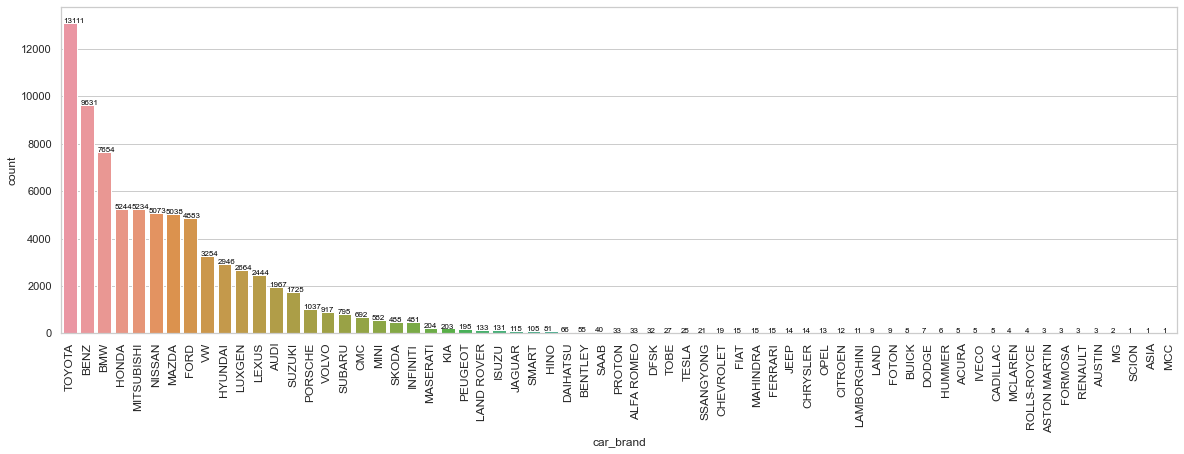

In [38]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='car_brand',data=df1, order=df1['car_brand'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=12);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+2), color='black', size=8)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32251 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38914 missing from c

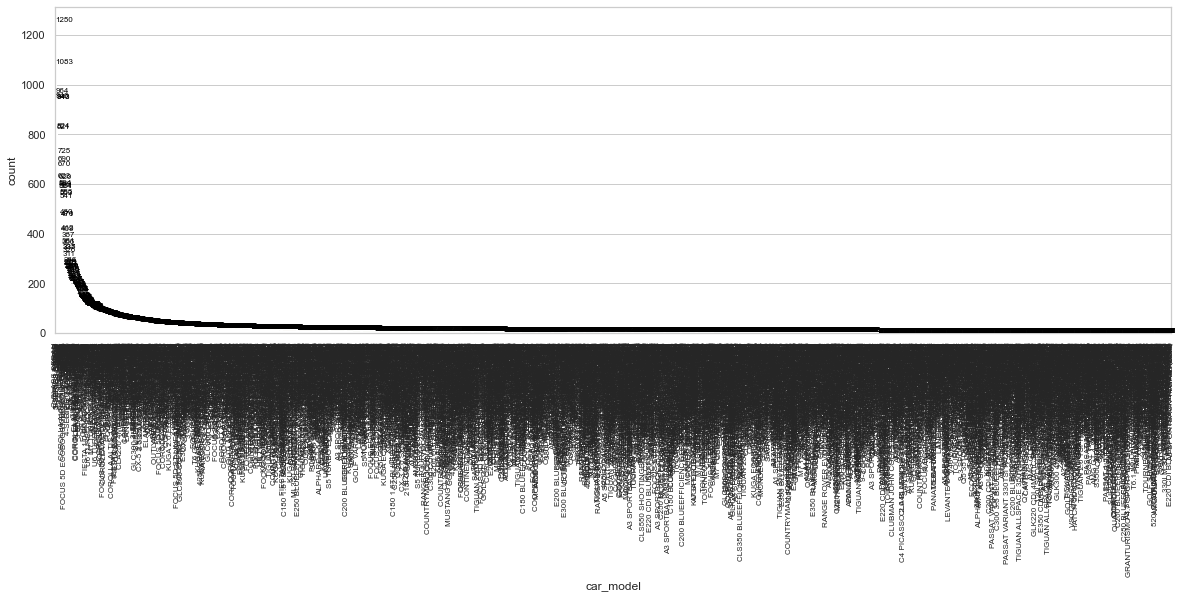

In [50]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='car_model',data=df1, order=df1['car_model'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=8);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+2), color='black', size=8)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='car_brand',data=df1, order=df1['car_brand'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+2), color='black', size=8)
plt.show()

In [17]:
df1['car_price'].groupby(by=df1['car_brand'].unique())

ValueError: Grouper and axis must be same length

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df1['car_brand'].unique(), y = df1['car_price'].groupby(by='car_brand'), data = df1, width=0.2, palette="Set3")
ax = sns.swarmplot(x = df1['car_brand'].unique(), y = df1['car_price'].groupby(by='car_brand'), data = df1, color = "red")

ValueError: Grouper and axis must be same length

In [ ]:
df1['car_brand'].groupby(by='car_brand').cout()

In [ ]:
sns.barplot(x= df1['car_band'].unique(), y = df1['car_brand'].count(), data=df1)

In [ ]:
df1.corr()

# To dummy variable

In [31]:
le = preprocessing.LabelEncoder()
le.fit(df1['car_brand'])
df1['car_brand'] = le.transform(df1['car_brand'])

In [ ]:
print(le.classes_)

In [ ]:
car_brand_dict = {k:v for v,k in enumerate(df1['car_brand'].unique())}

In [ ]:
print(car_brand_dict)

In [ ]:
df1['car_brand'] = df1['car_brand'].map(car_brand_dict)

In [32]:
df1['car_year'] = (2021 - df1['car_year'])

In [33]:
df1

,car_brand,car_year,car_mileage,car_price
0,62,12,197710,196000
1,45,5,81609,358000
2,59,8,53167,286000
3,46,8,92757,238000
4,46,6,43307,378000
...,...,...,...,...
83364,58,4,66000,698000
83365,36,18,16,110000
83366,40,4,11117,350000
83367,59,6,50000,370000


# remove outlier

In [34]:
df1['car_price'].describe()

count    7.756600e+04
mean     6.590999e+05
std      1.110430e+06
min      1.000000e+00
25%      2.680000e+05
50%      4.380000e+05
75%      7.680000e+05
max      1.000000e+08
Name: car_price, dtype: float64

In [35]:
df1['car_mileage'].describe()

count    7.756600e+04
mean     2.164588e+05
std      1.348905e+07
min      1.000000e+00
25%      4.727325e+04
50%      8.200000e+04
75%      1.300000e+05
max      2.147484e+09
Name: car_mileage, dtype: float64

In [ ]:
# df1[(np.abs(stats.zscore(df1['car_price'])) < 1.96) == False]

In [36]:
df1.drop(df1[(stats.zscore(df1['car_price']) > 1.96) == True].index , axis=0, inplace=True)

In [46]:
df1.drop(df1.loc[df1['car_price'] > 3000000].index , axis=0, inplace=True)

In [ ]:
# df1.drop(df1.loc[(np.abs(stats.zscore(df1['car_price'])) < 1.96) == False].index , axis=0, inplace=True)

In [45]:
df1.drop(df1.loc[df1['car_mileage'] > 300000].index , axis=0, inplace=True)

In [37]:
df1.drop(df1[(stats.zscore(df1['car_mileage']) > 1.96) == True].index, axis=0, inplace=True)

In [44]:
df1[(stats.zscore(df1['car_mileage']) > 1.96) == True]

,car_brand,car_year,car_mileage,car_price
600,46,12,380822,228000
1917,62,16,329258,128000
2132,46,3,775420,598000
2196,45,12,395378,530000
2209,7,9,396315,888000
...,...,...,...,...
82335,46,18,1151756,250000
82830,62,14,361848,198000
82875,26,11,388888,298000
83109,59,17,334356,158000


In [ ]:
# df1[(np.abs(stats.zscore(df1['car_mileage'])) < 1.96) == False]

In [ ]:
# df1.drop(df1.loc['' == False].index , axis=0 , inplace=True)

In [38]:
df1.shape

(76463, 4)

In [ ]:
# df1.drop(df1.loc[(np.abs(stats.zscore(df1['car_mileage'])) < 1.96) == False].index , axis=0 , inplace=True)

In [ ]:
# for i in ['car_year','car_mileage']:
#     sns.jointplot(x=i, y='car_price',data=df1[[i,'car_price']], height=7)

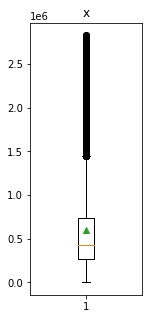

In [39]:
plt.figure(figsize=(2,5))
plt.boxplot(df1['car_price'],showmeans=True)
plt.title('x')
plt.show()

<AxesSubplot:xlabel='car_price'>

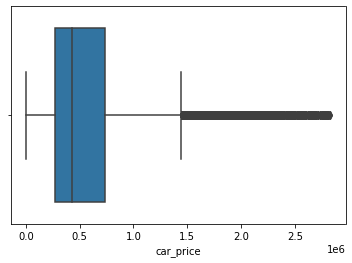

In [40]:
sns.boxplot(x=df1['car_price'])

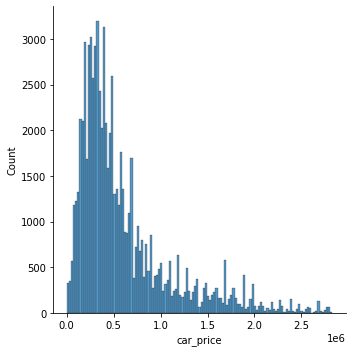

In [47]:
sns.displot(df1['car_price'])
plt.show()

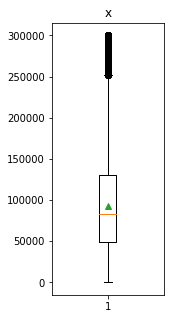

In [48]:
plt.figure(figsize=(2,5))
plt.boxplot(df1['car_mileage'],showmeans=True)
plt.title('x')
plt.show()

<AxesSubplot:xlabel='car_mileage'>

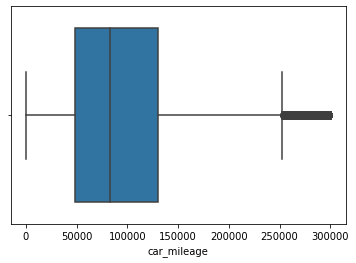

In [49]:
sns.boxplot(x=df1['car_mileage'])

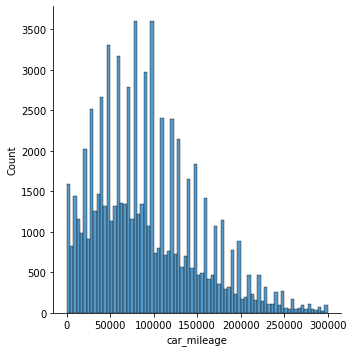

In [50]:
sns.displot(df1['car_mileage'])
plt.show()

In [ ]:
# print ("Shape Of The Before Ouliers: ",data.shape)
# n=1.5
# #IQR = Q3-Q1
# IQR = np.percentile(data['x'],75) - np.percentile(data['x'],25)
# #outlier = Q3 + n*IQR 
# data=data[data['x'] < np.percentile(data['x'],75)+n*IQR]
# #outlier = Q1 - n*IQR 
# data=data[data['x'] > np.percentile(data['x'],25)-n*IQR]
# print ("Shape Of The After Ouliers: ",data.shape)

# Split data

In [51]:
X = df1.drop(['car_price'], axis = 1)
y = df1.loc[:,'car_price']

In [ ]:
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# sns.heatmap(X.corr(),cmap=cmap,square=True,annot=True)

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

In [54]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Training

In [ ]:
	Model	r2_train	r2_test	d_train	d_test	rmse_train	rmse_test
8	LGBM	89.90	85.77	11.46	13.41	274,406.60	325,236.32
11	BaggingRegressor	96.82	84.97	5.42	12.62	154,048.31	334,278.98
7	XGB	87.70	84.66	12.95	14.19	302,861.88	337,698.16
6	Random Forest	96.75	84.62	5.50	12.75	155,706.68	338,065.90
12	ExtraTreesRegressor	99.31	84.48	0.96	11.85	71,730.49	339,694.29
9	GradientBoostingRegressor	77.28	77.13	18.23	18.07	411,657.37	412,264.28
5	Decision Tree Regressor	99.31	76.61	0.96	14.39	71,730.45	416,962.33
3	MLPRegressor	74.20	73.92	19.17	19.05	438,652.67	440,283.91
13	AdaBoostRegressor	62.49	62.34	25.49	25.27	528,888.33	529,050.27
0	Linear Regression	61.64	58.44	23.91	23.89	534,865.15	555,802.12
10	RidgeRegressor	61.64	58.44	23.91	23.89	534,865.19	555,793.60
14	VotingRegressor	59.23	58.33	24.99	24.88	551,429.32	556,535.26
4	Stochastic Gradient Decent	58.67	38.73	23.35	23.57	555,173.63	674,844.11
2	Linear SVR	43.94	35.56	27.61	27.69	646,616.92	692,091.67
1	Support Vector Machines	15.08	14.76	37.10	36.88	795,793.93	795,961.55

### LinearRegression & GradientBoost

In [55]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_y_preds = lin_model.predict(X_test)

In [56]:
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    reg_lambda=1.0
)

lgb_model.fit(X_train, y_train)
lgb_y_preds = lgb_model.predict(X_test)

In [57]:
lin_loss = mean_squared_error(y_test, lin_y_preds, squared=False)

lgb_loss = mean_squared_error(y_test, lgb_y_preds, squared=False)

In [58]:
print('Linear Regression RMSE：',lin_loss)
print('Gradient Boosted RMSE：', lgb_loss)

Linear Regression RMSE： 395509.02038442483
Gradient Boosted RMSE： 242756.6236137429


In [59]:
print('Linear Regression R*2：', lin_model.score(X_test, y_test))
print('Gradient Boosted R*2：', lgb_model.score(X_test, y_test))

Linear Regression R*2： 0.39679924452920345
Gradient Boosted R*2： 0.7727566055688468


### SVM

In [60]:
# not good
svr = SVR()
svr.fit(X_train, y_train)
print('DecisionTree R*2：', svr.score(X_test, y_test))

DecisionTree R*2： -0.10842660619656752


### ExtraTreesRegressor

In [64]:
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
etr_y_preds = etr.predict(X_test)
etr_loss = mean_squared_error(y_test, etr_y_preds, squared=False)
print('ExtraTreeRegressor RMSE:', etr_loss)
print('ExtraTreeRegressor R2:', etr.score(X_test, y_test))

RMSE: 261189.27449371165
R2: 0.7369369996875309


### DecisionTreeClassifier

In [65]:

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=0)
bag.fit(X_train, y_train)
bag_y_preds = bag.predict(X_test)
bag_loss = mean_squared_error(y_test, bag_y_preds, squared=False)
print('ExtraTreeRegressor RMSE:', bag_loss)
print('DecisionTree R*2：', bag.score(X_test, y_test))

MemoryError: could not allocate 1094189056 bytes

### RandomForestClassifier

In [ ]:
param_grid = { 
    'n_estimators': [100, 150, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(3,11),
    'criterion' :['gini', 'entropy']
}
RF = RandomForestClassifier()
gs1 = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
gs1.fit(X_train,y_train)


In [ ]:
print(gs1.best_params_)
print(gs1.best_score_)

In [ ]:
RF1 = RandomForestClassifier(n_estimators=100, random_state=0)
RF1.fit(X_train, y_train)
print('RandomForest R*2：', RF1.score(X_test, y_test))

### XgboostClassifier

In [ ]:
param={'n_estimators':[10,20,50,100,150,200],
 'max_depth':range(3,11),
 'eta':[0.05,0.1,0.15,0.2,0.25,0.3]}
xgr = xgb.XGBRegressor()
gs = GridSearchCV(estimator=xgr,param_grid=param,scoring='neg_root_mean_squared_error',cv=5,verbose=3)
gs.fit(X_train,y_train)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
xgr=xgb.XGBRegressor(eta=0.1,max_depth=5,n_estimators=150)
xgr.fit(X_train,y_train)
xgbpred=xgr.predict(X_test)
print('RMSE: ',mean_squared_error(y_test, xgbpred, squared=False))
print('R2Score: ',xgr.score(X_test, y_test))

# Single car_brand training

In [ ]:
df2 = df1.loc[df1['car_brand'] == 62]

In [ ]:
X = df2.drop(['car_price','car_brand'], axis = 1)
y = df2.loc[:,'car_price']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_y_preds = lin_model.predict(X_test)

In [ ]:
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    reg_lambda=1.0
)

lgb_model.fit(X_train, y_train)
lgb_y_preds = lgb_model.predict(X_test)

In [ ]:
lin_loss = mean_squared_error(y_test, lin_y_preds, squared=False)
lgb_loss = mean_squared_error(y_test, lgb_y_preds, squared=False)

In [ ]:
print('Linear Regression RMSE：',lin_loss)
print('Gradient Boosted RMSE：', lgb_loss)

In [ ]:
print('Linear Regression R*2：', lin_model.score(X_test, y_test))
print('Gradient Boosted R*2：', lgb_model.score(X_test, y_test))

In [ ]:
param_grid = { 
    'n_estimators': [100, 150, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(3,11),
    'criterion' :['gini', 'entropy']
}
RF = RandomForestClassifier()
gs1 = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
gs1.fit(X_train,y_train)


In [ ]:
print(gs1.best_params_)
print(gs1.best_score_)

In [ ]:
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print('RMSE：', mean_squared_error(y_test, rfcpred, squared=False))
print('R2Score', rfc.score(X_test, y_test))
print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test, rfcpred))

In [ ]:

param={'n_estimators':[10,20,50,100,150,200],
 'max_depth':range(3,11),
 'eta':[0.05,0.1,0.15,0.2,0.25,0.3]}
xgr = xgb.XGBRegressor()
gs = GridSearchCV(estimator=xgr,param_grid=param,scoring='neg_root_mean_squared_error',cv=5,verbose=3)
gs.fit(X_train,y_train)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
xgr=xgb.XGBRegressor(eta=0.3,max_depth=3,n_estimators=20)
xgr.fit(X_train,y_train)
xgbpred=xgr.predict(X_test)
print('RMSE: ',mean_squared_error(y_test, xgbpred, squared=False))
print('R2Score: ',xgr.score(X_test, y_test))